# Support Vector Machine: Clasificación

_Autor:_ [Luis Carlos Padierna](https://scholar.google.com/citations?user=JhchZkQAAAAJ&hl=es&oi=ao)

_Editado por:_ Edwin Bedolla

**NOTA:** Esta introducción, y por extensión este documento, no será _rigurosa_ en la descripción matemática del modelo y metodología aquí presentados debido a su extensión, complejidad y dificultad; existe mucha literatura al respecto por lo que se remite al lector a todas la referencias al final de este documento.

## Introducción a las Máquinas de Soporte Vectorial

Las Máquinas de Soporte Vectorial, o bien _Support Vector Machines_ en inglés, son un modelo matemático de optimización que permite aprender características de un conjunto de datos y generalizarlas a datos desconocidos, empleando un paradigma de aprendizaje conocido como _máquinas de kernel._

Este modelo fue un parteaguas en el desarrollo de la investigación de aprendizaje automatizado e inteligente cuando surgió por primera vez, creado por Vladimir Vapnik y muchos otros en un intento por crear un clasificador realmente capaz de distinguir entre dos clases particulares dentro de un conjunto de datos con características determinadas.

La gran innovación de esta metodología fue su _rigor matemático_, esto es, el método se describe completamente por sus propiedades matemáticas a partir de un problema de optimización. Empleando muchas de las áreas novedosas de las matemáticas se pudo crear un esquema de _aprendizaje de máquina_ realmente poderoso, robusto y riguroso pero sobre todo _inteligente_ que podía tomar un conjunto de datos y realizar predicciones tanto precisas como exactas.

Con el desarrollo del paradigma de _aprendizaje profundo_ las Máquinas de Soporte Vectorial empezaron a tomar un rumbo diferente en el panorama contemporáneo de la _Inteligencia Computacional_ donde ahora forman parte de redes neuronales para potenciar la clasificación y predicción de datos; esto es, ya no se emplean como métodos individuales sino como parte de una estructura más compleja de _aprendizaje automático._

## Estructura y funcionamiento del método

Las Máquinas de Soporte Vectorial (MSV) realizan la clasificación y predicción de los datos creando **hiperplanos** de separación entre _dos clases_ dentro de un conjunto de datos. Si un nuevo _punto_ o _dato_ cae de un lado del _hiperplano_ pertenece a una clase, en caso contrario se asigna a la clase opuesta. Aquí se presentan dos de las **propiedades** de las Máquinas de Soporte Vectorial:

1. Solamente pueden separar entre dos clases (clasificación binaria)
2. La separación entre clases **siempre** se realiza mediante un _hiperplano._

Estas dos propiedades de las MSV son fundamentales, y definen por completo la metodología y la estructura del algoritmo.
Pero las preguntas obligatorias son: ¿cómo se define el _hiperplano_ de separación? ¿cómo se emplean las características del conjunto de datos para discernir entre ambas clases?

Estas preguntas se responden de forma simple con la formulación matemática de las MSV, que se presenta a continuación.

## Formulación matemática

Las MSV construyen el _hiperplano_ de separación mediante un problema de optimización descrito a continuación.

Dado un conjunto de datos de entrenamiento $x_i \in \mathbb{R}^p,i=1,2,\cdots,n$ separados en dos clases, y un arreglo de etiquetas para cada elemento del conjunto de datos $y \in \{-1,1\}^n$ las MSV resuelven el siguiente problema de optimización

$$
\begin{align}
    \min_{w,b,\zeta} \frac{1}{2} w^{\text{T}} w + C \sum_{i=1}^{n} \zeta_i \\
    \text{sujeto a } y_i (w^{\text{T}} \phi(x_i) + b) \geq 1 - \zeta_i \\
    \zeta_i \geq 0, i = 1, 2, \cdots, n
\end{align}
$$

donde $K(x_i, x_j) = \phi(x_i)^{\text{T}} \phi(x_j)$ corresponde a un _kernel de Mercer_ que permite mapear el conjunto de datos a otro espacio; se hablará más al respecto más adelante en el documento.

Por el momento, es posible que esta formulación matemática no tenga mucho sentido, y en realidad es cierto dado que el problema tal cual está planteado no se puede resolver como tal; esta es la formulación teórica tal cual se definió cuando el método se publicó. Este probla de optimización en realidad es más complejo dado que se deben tomar en cuenta la topología y estructura del espacio donde se está trabajando, esto implica que se deben emplear herramientas de topología y análisis real para comprender verdaderamente el planteamiento. Se remite al lector a las referencias para ahondar en la parte teórica y derivación.

## Interpretación intuitiva de las MSV

Con la formulación matemática se tiene un concepto general de las MSV y lo que realizan como metodología, pero es posible traducirlo a palabras de la siguiente forma:

> Las MSV minimizan la distancia entre los puntos de las clases y el _hiperplano_ que las separa.

Este enunciado resume una parte de la formulación matemática, es así como el _hiperplano_ es formado y entonces realiza la clasificación correspondiente. La segunda parte de la formulación matemática habla de la _tercera propiedad_ fundamental de las MSV, los **vectores soporte:**

3. Los **vectores soporte** corresponden a los puntos más cercanos al _hiperplano_ de separación, formando la _frontera de decisión._

Esta propiedad es la que le proporcionó fama y gloria a las MSV pues implica que no siempre es necesario tener todo el conjunto de datos para realizar una clasificación precisa y exacta, basta con tener los _vectores soporte_ de cada clase para hacerlo. Es decir, si el conjunto de datos consta de 3000 elementos y los vectores soporte son solamente 3 en total, la eficiencia computacional para realizar la clasificación es excelente, no hay pérdida de información y siempre será exacta.

A continuación se presentan ejemplos de las propiedades y metodología general de las MSV.

## Sobre la implementación de las MSV

Las MSV constituyen un problema computacional de implementación importante. Debido a su formulación matemática y estructura metodológica no se puede realizar una implementación simple. En lo que queda de este documento se emplea la implementación de `scikit-learn`, que a su vez emplea la implementación de `libsvm`; al final del documento se colocan las referencias de las documentaciones de cada librería.

In [33]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.svm import SVC
from sklearn.datasets import make_blobs, make_circles

# Importar los widgets de interacción
from ipywidgets import interact, fixed

### Hiperplano de separación

Empleando un pequeño conjunto de datos se observará cómo se construye el _hiperplano_ de separación entre las clases. El siguiente código es interactivo por lo que se puede manipular y corroborar el efecto del parámetro $C$ que corresponde a la _tolerancia_ de aceptar o rechazar un punto de acuerdo a la distancia correspondiente.

In [8]:
def mySVC(myKernel='linear', myC=0.01):       
    # Crear un conjunto de puntos
    X = np.array([[-2.0, 2.0], [3.0, -1.0], [-1.0, -1.0],
                  [-2.0, -1.0], [1.0, 1.0], [2.0, 1.0], [-1.5,.75]])
    # Y sus respectivas etiquetas
    y = np.array([1, 2, 1, 1, 2, 2, 1])
    
    # Instanciar el clasificador y entrenarlo
    clf = SVC(kernel=myKernel, C=myC)    
    clf.fit(X, y) 
    
    print("Función de Decisión: {}".format(clf.decision_function(X)))        
    print("Predicción: {}".format(clf.predict(X)))    
    print("Vectores Soporte: {}".format(len(clf.support_vectors_)))            
    print("Multiplicadores: {}".format(np.abs(clf.dual_coef_)))
    
    # Los puntos y los vectores soporte encontrados
    plt.scatter(X[:,0], X[:,1] , c=y, s=150, edgecolors='none', cmap='winter')
    plt.scatter(clf.support_vectors_[:,0], clf.support_vectors_[:,1] , lw=2, s=200, edgecolors='k',facecolors='none')
    # Para graficar el resultado y las fronteras de decisión
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    x = np.linspace(xlim[0], xlim[1], 3)
    z = np.linspace(ylim[0], ylim[1], 3)
    Y, X = np.meshgrid(z,x)
    xz = np.vstack([X.ravel(), Y.ravel()]).T
    P =clf.decision_function(xz).reshape(X.shape)
    ax.contour(X, Y, P, colors='r', levels = [-1, 0, 1], alpha=0.5, linestyles = ['--', '-', '--'])

In [9]:
interact(mySVC, myKernel=["linear", "rbf", "poly"], myC=(0.01, 3, 0.1), addPoint=[0,0])

interactive(children=(Dropdown(description='myKernel', options=('linear', 'rbf', 'poly'), value='linear'), Flo…

<function __main__.mySVC(myKernel='linear', myC=0.01)>

Para un valor de $C > 1$ se puede observar que los _vectores soporte_ se encuentran y son únicos; entre mayor sea el valor de $C$ este hecho no cambiará.

Algo importante a observar con esta figura es el _hiperplano_ de separación, el cual es en realidad una _recta_ y esto se debe al espacio del conjunto de datos, pero siempre debe ser un _hiperplano._ Algo más a observar es la _tercera propiedad_ y es que los _vectores soporte_ son los puntos más cercanos al _hiperplano_ de separación; todo punto que cae dentro de esta frontera y después pertenece a una u otra clase.

## Kernels y espacios auxiliares

Esta es la 4 y última **propiedad** de las MSV, correspondiente al espacio del conjunto de datos y la formulación matemática intrínseca de las MSV:

4. Las MSV pueden emplear **kernels de Mercer** para encontrar un espacio donde el conjunto de datos sea _linealmente separable._

Si se regresa a la formulación matemática dentro de este documento se puede leer que se introdujo un _kernel de Mercer_ en la formulación. ¿Porqué? Esta pregunta se puede responder con otra pregunta: ¿qué sucede cuando el espacio del conjunto de datos no permite un _hiperplano_ de separación entre las clases?

Esta pregunta es simple de responder: cuando el conjunto de datos **no** es _linealmente separable_ las MSV no se pueden aplicar. Esto contradice todas las 4 propiedades, o _axiomas_ de las MSV pues implicaría que estas 4 propiedades se pueden modificar según cada conjunto de datos, y esto es _inaceptable._ El modelo de MSV debe ser lo suficientemente general para ser aplicable a cualquier tipo de conjunto de datos, de hecho está demostrado y existe mucha literatura al respecto. Entonces, ¿qué alternativa existe?

Los _espacios auxiliares_ son la única alternativa y la más robusta. Básicamente, se pretende encontrar un espacio donde el conjunto de datos pueda ser separado en dos clases mediante un _hiperplano_ y para esto se necesita de una función o _mapeo_ que pueda _transformar_ los datos de un espacio a otro y es en este nuevo espacio donde se pueden aplicar las MSV.

A continuación se presentan ejemplos de este hecho, y se irán comentando algunas cosas al respecto.

In [10]:
# Cargar funciones auxiliares para graficar
%run plots.py

<Figure size 432x288 with 0 Axes>

In [14]:
def SVC_polinomial(myC=0.01, rs=0):
    # Crear conjuntos de datos artificiales, dos clases de 10
    # puntos cada una
    X, y = make_blobs(n_samples=20, centers=2, random_state=rs, cluster_std=0.60)
    # Graficar los datos
    p = plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="winter")
    
    # Crear el clasificador y entrenarlo
    model = SVC(kernel="poly", C=myC, gamma="auto")
    model.fit(X, y)
    
    # Graficar los vectores soporte y las fronteras de decisión
    plot_svc_decision_function(model, plot_support=True)

Cuando se hace la instancia del clasificador se especifica el kernel _polinomial_, esto es, una función que va a mapear el conjunto de datos a otro espacio auxiliar donde en este nuevo espacio los conjuntos son linealmente separables.

In [17]:
interact(mySVM_plot, myC=(0.001, 2.0, 0.02), rs=(0, 5, 1))

interactive(children=(FloatSlider(value=0.01, description='myC', max=2.0, min=0.001, step=0.02), IntSlider(val…

<function __main__.mySVM_plot(myC=0.01, rs=0)>

Para hacer más explícito el hecho de que el espacio auxiliar es diferente se grafica la frontera de decisión y el _"hiperplano de separación"_; en realidad no es un hiperplano pues se puede ver que tiene una ligera curvatura. En realidad se está graficando el _hiperplano_ en el espacio auxiliar, una proyección de cómo se vería este hiperplano.

Esta observación es muy importante, nótese que los _vectores soporte_ sobre la frontera de decisión siguen siendo los más cercanos pero se alcanza a distinguir la curvatura de la frontera. Siempre se debe preservar el hecho de que el conjunto de datos sea _linealmente separable_, y por lo tanto es crucial emplear un _kernel._

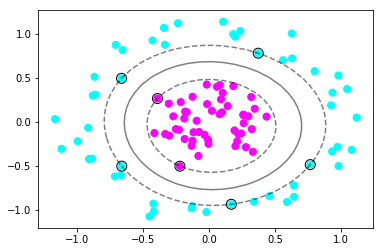

In [24]:
# Crear un conjunto de datos de círculos concéntricos
X, y = make_circles(100, factor=0.3, noise=0.1)

# Crear el clasificador y entrenarlos
model = SVC(kernel="rbf", C=100, gamma="auto").fit(X, y)

# Graficar los datos y la frontera de decisión
plt.scatter(X[:,0], X[:,1], c=y, s=50, cmap="cool")
plot_svc_decision_function(model, plot_support=True)

Este es un ejemplo muy interesante que vale la pena estudiar a fondo. Este conjunto de datos corresponde a dos círculos concéntricos, cada círculo pertenece a una clase particular. En este caso **no** se puede utilizar un MSV con el conjunto de datos dado que no son _linealmente separables_; no se puede construir un _hiperplano_ tal que separe correctamente ambas clases.

Es imperativo emplear un _kernel de Mercer_ que ayude a crear un espacio auxiliar donde el conjunto de datos sea _linealmente separable_. Primero, se va a proyectar el conjunto de datos en un espacio donde se presume se pueden separar en las dos clases que son.

In [28]:
# Definir la función que corresponde a un paraboloide invertido
r = np.exp(-(X ** 2).sum(1))

def plot_3D(elev=30, azim=30, X=X, y=y):
    # Graficar en 3D la proyección de la función matemática anterior
    ax = plt.subplot(projection="3d")
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=50, cmap="autumn")
    ax.view_init(elev=elev, azim=azim)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("r")

In [29]:
grafica = interact(plot_3D, elev=20, azim=45, X=fixed(X), y=fixed(y))

interactive(children=(IntSlider(value=20, description='elev', max=60, min=-20), IntSlider(value=45, descriptio…

Claramente en este nuevo espacio ambas clases son _linealmente separables_ porque se puede dibujar un _hiperplano_ en medio de ambos subconjuntos. Pero este es un espacio auxiliar y no corresponde al espacio donde se tienen los datos originalmente. En este caso, la formulación matemáticas de las MSV se mantiene pero se debe emplear una formulación equivalente para tomar en cuenta estas propiedades del espacio.

De cualquier forma, ahora ambas clases son _linealmente separables_ y se puede proceder a crear la clasificación.

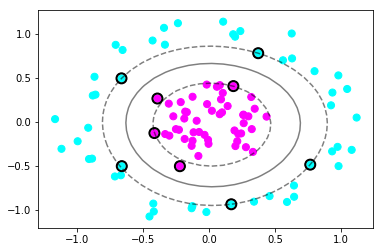

In [32]:
# Instanciar un model SVC y entrenarlo
model = SVC(kernel="rbf", C=10, gamma="auto")
model.fit(X, y)

# Mostrar los datos y los vectores soporte así como la frontera de decisión
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap="cool")
plot_svc_decision_function(model, plot_support=True)
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
            s=100, lw=2, edgecolors="k", facecolors="none")

En la figura se pueden ver las _fronteras de decisión_ así como los _vectores soporte._ Nótese que las _fronteras_ también son círculos concéntricos, esto es porque en el espacio auxiliar donde son _hiperplanos_ en realidad se proyectan y resultan ser círculos.

Nótese algo muy importante, el número de _vectores soporte,_ esta observación no se considera una propiedad o _axioma_ de las MSV por el hecho que no siempre se cumple, como ya se había mencionado en la introducción. El número de _vectores soporte_ en este ejemplo corresponde a un número muy pequeño respecto al total dentro de cada clase y la gran ventaja de las MSV es poder generalizar un modelo de clasificación con tan pocos puntos.

## Referencias (con algunos comentarios)

1. Kecman, V. Support Vector Machines, an introduction. [Link](https://www.researchgate.net/profile/Vojislav_Kecman/publication/226743605_Support_Vector_Machines_-_An_Introduction/links/02e7e52971b20615e7000000.pdf)
    
    Esta introducción pretende ser simple pero a la vez completa en su descripción de las MSV, pero se considera que ya se tiene algo de conocimiento en el tema de clasificación.

2. Deng, N., Tian, Y., & Zhang, C. (2012). Support vector machines: optimization based theory, algorithms, and extensions. Chapman and Hall/CRC.

    Este libro se considera _el libro_ cuando se trata de MSV y toda la teoría detrás. Es demasiado riguroso en las matemáticas, por lo que solamente se recomienda si se ha llevado varios cursos de cálculo, un curso de métodos numéricos y recordar muy bien los conceptos de teoría de conjuntos. Poder entender todo sobre este libro y lo que propone corresponde a dominar por completo las MSV.
    
3. De Sa, J. M. (2012). Pattern recognition: concepts, methods and applications. Springer Science & Business Media.

    Este libro de texto contiene una introducción a todos los temas de reconocimiento de patrones incluido las MSV. Es un libro simple de entender pero sin perder el rigor matemático. Se necesitan menores requisitos que el libro anterior en cuanto a matemáticas.
    
4. Friedman, J., Hastie, T., & Tibshirani, R. (2001). The elements of statistical learning (Vol. 1, No. 10). New York: Springer series in statistics.

    Este es uno de los mejores libros de texto para todos los algoritmos clásicos de _inteligencia computacional_. Tiene un capítulo dedicado a las MSV donde se explica a detalle el algoritmo sin tener tanto rigor matemático (algo semejante a lo que se presenta en este documento), sin embargo se requiere de leer algunas otras secciones del libro para comprender por completo lo que se expone.